## House Price Prediction: Project Overview
- Create tool that estimates house price 
- Analyzing features that affect house prices 
- Creating base model with few machine learning algorithm (Linear Regression, XGB Regression, Decision Tree, and Random Forest)
- Hyperparameter tuning all model and optimized them with GridSearchCV

<p><img src="https://image.slidesharecdn.com/project1-161105030013/95/machine-learning-clustering-classifying-houses-in-king-county-wa-4-638.jpg?cb=1478369073">   

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('kc_house_data.csv', parse_dates = ['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df_desc = []
for i in df.columns:
    df_desc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum())/ (len(df))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])
df_desc = pd.DataFrame(df_desc, columns = ['Data Features', 'Data Types', 'NaN', 'NaN Percentage', 'Unique', 'Unique Sample'])
df_desc 

,Data Features,Data Types,NaN,NaN Percentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[7129300520, 6414100192, 5631500400, 248720087..."
1,date,object,0,0.0,372,"[20141013T000000, 20141209T000000, 20150225T00..."
2,price,float64,0,0.0,4028,"[221900.0, 538000.0, 180000.0, 604000.0, 51000..."
3,bedrooms,int64,0,0.0,13,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]"
4,bathrooms,float64,0,0.0,30,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7..."
5,sqft_living,int64,0,0.0,1038,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060..."
6,sqft_lot,int64,0,0.0,9782,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ..."
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]"


In [25]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.duplicated().sum()

0

In [24]:
### Checking the value that's unsual  
df[df['bedrooms'] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age


In [27]:
df[df['bathrooms'] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
208,1222000055,2014-11-23,180250.0,2,0.75,900,9600,1.0,0,0,...,900,0,1941,0,98166,47.4604,-122.339,1250,14280,73
264,2123039032,2014-10-27,369900.0,1,0.75,760,10079,1.0,1,4,...,760,0,1936,0,98070,47.4683,-122.438,1230,14267,78
350,7325600160,2014-06-04,299000.0,1,0.75,560,12120,1.0,0,0,...,560,0,1967,0,98014,47.6750,-121.854,1300,19207,47
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,...,430,0,1912,0,98014,47.6499,-121.909,1200,7500,102
569,4045500710,2014-12-18,405000.0,2,0.75,1160,15029,1.0,0,0,...,870,290,1937,0,98014,47.6929,-121.870,1870,25346,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19198,5016001619,2015-01-22,699999.0,3,0.75,1240,4000,1.0,0,0,...,1240,0,1968,0,98112,47.6239,-122.297,1460,4000,47
19344,2114700090,2015-03-01,151000.0,2,0.75,720,5040,1.0,0,0,...,720,0,1949,0,98106,47.5323,-122.347,1290,4120,66
20017,1025039168,2014-09-23,290000.0,1,0.75,740,1284,1.0,0,0,...,740,0,1928,0,98107,47.6741,-122.406,1430,3988,86
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,5


In [22]:
# Since its weird house with no bedrooms or bathrooms, I will replace 0 value with median 
df['bedrooms'] = df['bedrooms'].replace(0, df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].replace(0, df['bathrooms'].median())

In [28]:
df['age'] = df['date'].dt.year - df['yr_built']
df['age'].sort_values()

1763      -1
8039      -1
21372     -1
7526      -1
19805     -1
        ... 
9005     115
8732     115
11610    115
2977     115
14569    115
Name: age, Length: 21613, dtype: int64

In [29]:
# binning the age of the building column

bin_age = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']

df['age_group'] = pd.cut(df['age'], bins = bin_age, labels = labels)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,59,51-75
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,51-75
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,82,76-100
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,49,26-50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,28,26-50


In [47]:
# Bining Grade
bin_quality =[1,5,10,13]
label = ['Low', 'Average', 'High']

df['Quality'] = pd.cut(df['grade'], bins = bin_quality, labels = label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_group,price_group,Quality
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,59,51-75,upto 250k,Average
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,63,51-75,upto 750k,Average
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,82,76-100,upto 250k,Average
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,49,26-50,upto 750k,Average
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,28,26-50,upto 750k,Average


In [32]:
# Bining Price 
bin_price =[0,250000,500000,750000, 1000000, 2000000, df['price'].max()]
label_price = ['upto 250k', 'upto 500k', 'upto 750k','upto 1mil','upto 2mil', 'more than 2 mil']

df['price_group'] = pd.cut(df['price'], bins = bin_price, labels = label_price)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_group,price_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,59,51-75,upto 250k
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,63,51-75,upto 750k
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,82,76-100,upto 250k
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,49,26-50,upto 750k
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,28,26-50,upto 750k


In [9]:
df['date'] = df['date'].str.strip('T000000')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

## Exploratory Data Analysis

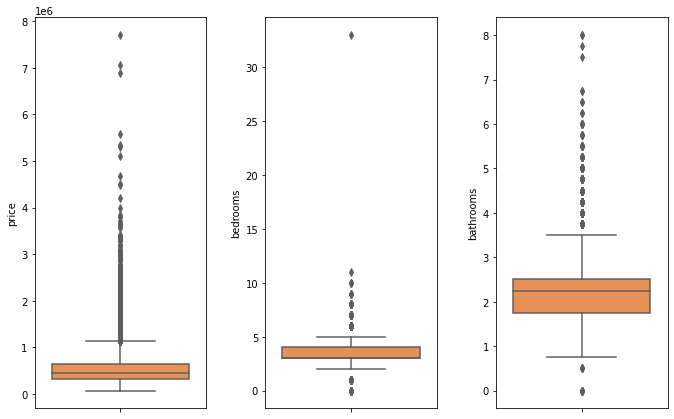

In [35]:
f, axes = plt.subplots(1, 3, figsize = (10,6.5))
f.tight_layout(pad=2.8)
sns.boxplot(y= df['price'], palette = 'YlOrRd', ax=axes[0])
sns.boxplot(y= df['bedrooms'],ax=axes[1],palette = 'YlOrRd')
sns.boxplot(y= df['bathrooms'],ax=axes[2],palette = 'YlOrRd')

plt.show()

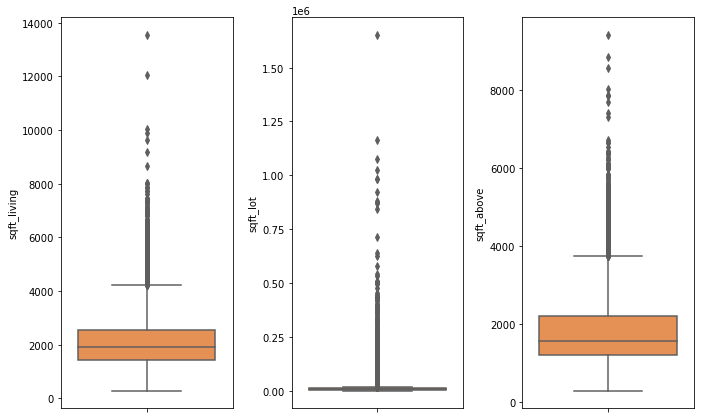

In [36]:
f, axes = plt.subplots(1, 3, figsize = (10,6.5))
f.tight_layout(pad=2.8)
sns.boxplot(y= df['sqft_living'],ax=axes[0],palette = 'YlOrRd')
sns.boxplot(y= df['sqft_lot'],ax=axes[1],palette = 'YlOrRd')
sns.boxplot(y= df['sqft_above'],ax=axes[2],palette = 'YlOrRd')

plt.show()

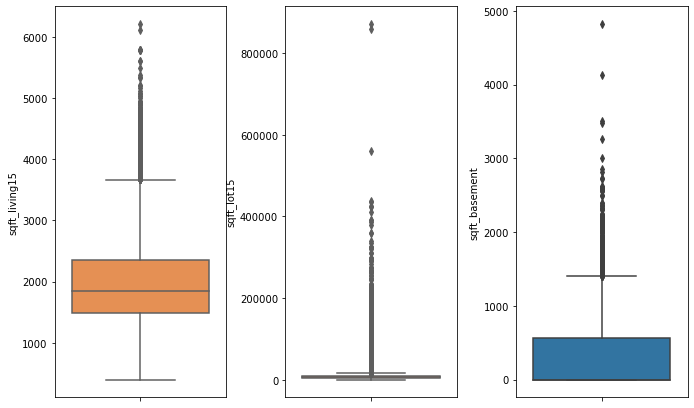

In [50]:
f, axes = plt.subplots(1, 3, figsize = (10,6.5))
f.tight_layout(pad=2.8)
sns.boxplot(y= df['sqft_living15'],ax=axes[0],palette = 'YlOrRd')
sns.boxplot(y= df['sqft_lot15'],ax=axes[1],palette = 'YlOrRd')
sns.boxplot(y= df['sqft_basement'],ax=axes[2],palette = 'tab20')

plt.show()

## Univariate Analysis

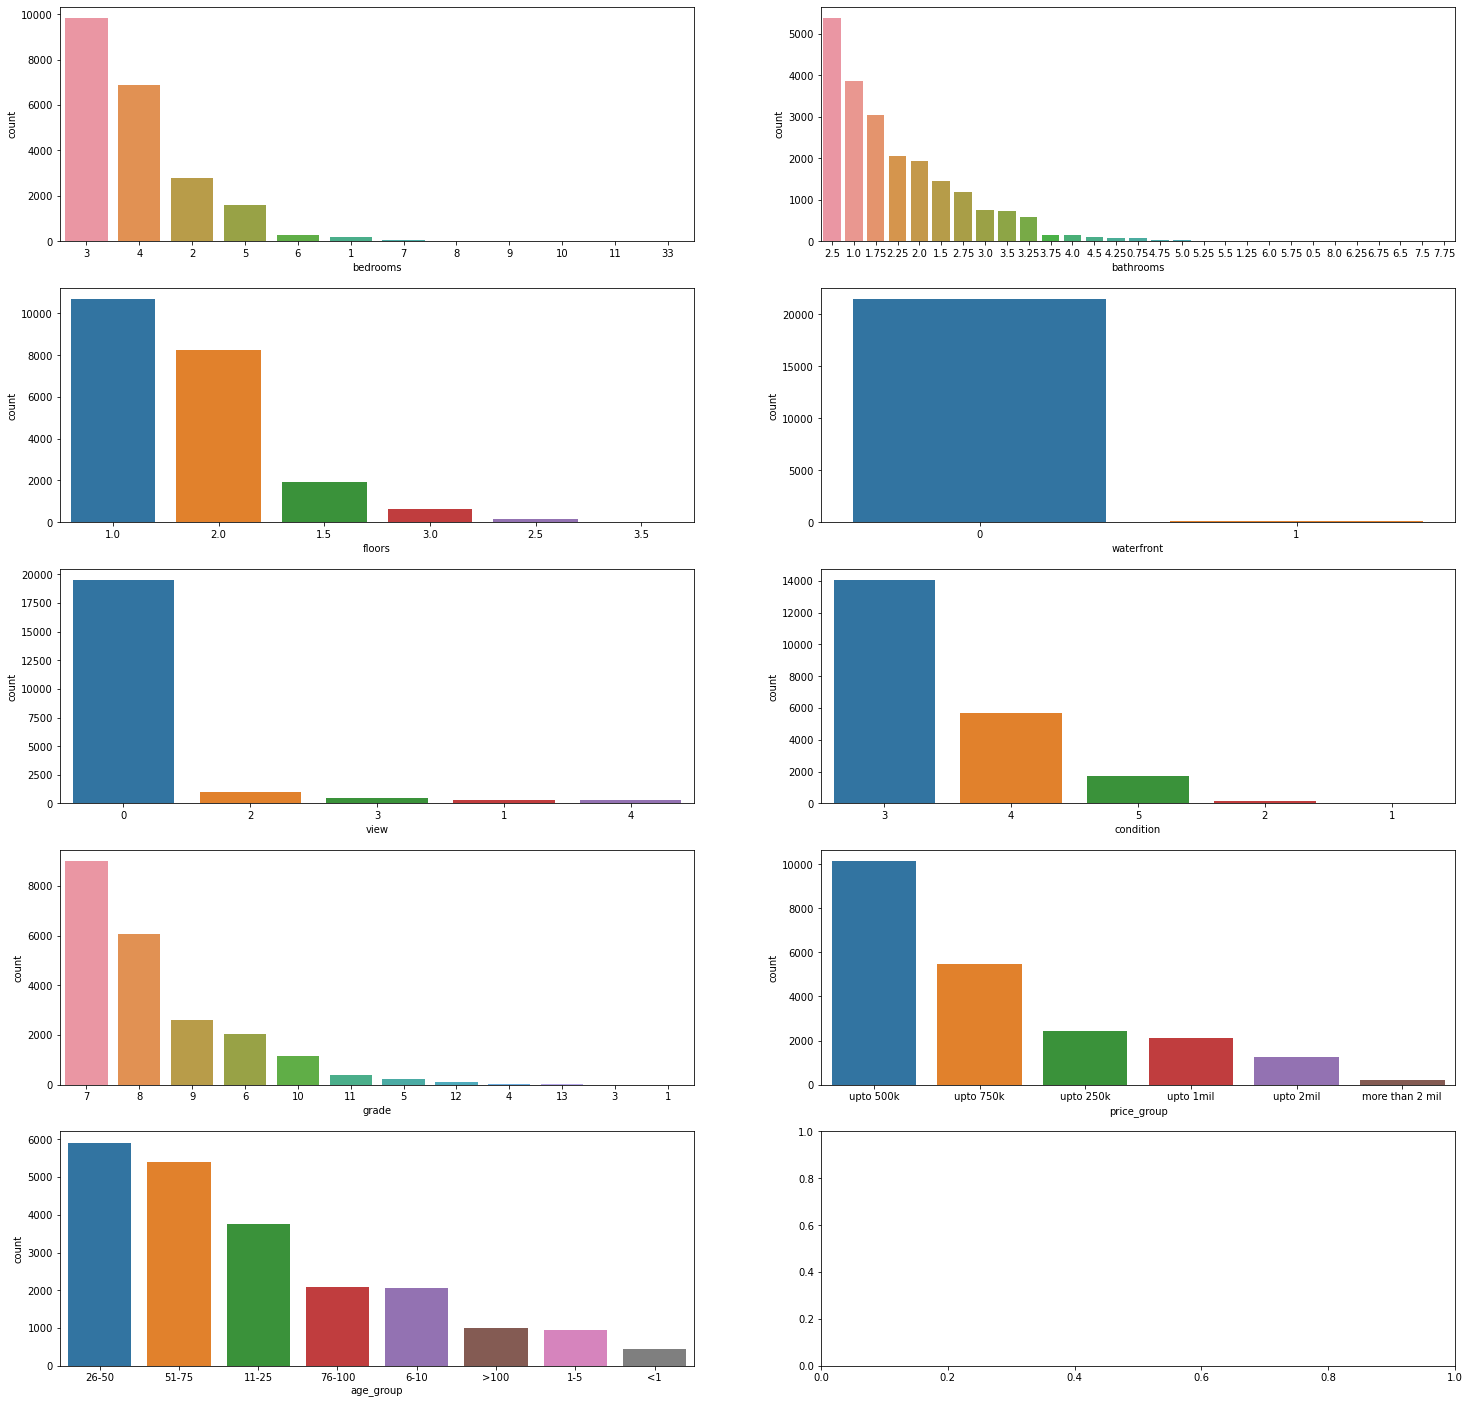

In [35]:
fig, axes = plt.subplots(ncols=2, nrows=5, figsize = (25,25))

sns.countplot(x='bedrooms',order = df['bedrooms'].value_counts().index, data=df, ax=axes[0][0])
sns.countplot(x='bathrooms',order = df['bathrooms'].value_counts().index, data=df, ax=axes[0][1])
sns.countplot(x='floors',order = df['floors'].value_counts().index, data=df, ax=axes[1][0])
sns.countplot(x='waterfront',order = df['waterfront'].value_counts().index, data=df, ax=axes[1][1])
sns.countplot(x='view',order = df['view'].value_counts().index, data=df, ax=axes[2][0])
sns.countplot(x='condition',order = df['condition'].value_counts().index, data=df, ax=axes[2][1])
sns.countplot(x='grade',order = df['grade'].value_counts().index, data=df, ax=axes[3][0])
sns.countplot(x='price_group',order = df['price_group'].value_counts().index, data=df, ax=axes[3][1])
sns.countplot(x='age_group',order = df['age_group'].value_counts().index, data=df, ax=axes[4][0])
plt.show()


### From this plot, we knew that:
   - Most sold house has 3 `bedrooms`
   - Most sold house has 2.5 `bathrooms` it means has 2 full bathrooms and 1 sink
   - Most sold house has 1 `floor`
   - Most sold house has no `waterfront`
   - Most sold house has 0 `view` it means they don't care about the view
   - Most sold house has 3 `condition` which is avergae
   - Most sold house has 7 `grade` out of 13
   - Most sold house `price` is up to 500k
   - Most sold house `age_building` is 26 - 50 years

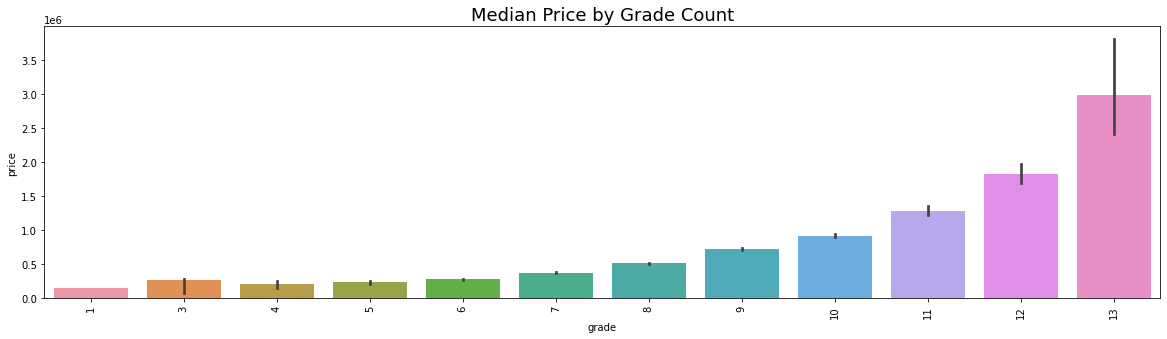

grade
13    2983000.0
12    1817500.0
11    1284000.0
10     914327.0
9      720000.0
8      510000.0
7      375000.0
6      275276.5
3      262000.0
5      228700.0
4      205000.0
1      142000.0
Name: price, dtype: float64

In [8]:
fig = plt.subplots(figsize = (20,5))
sns.barplot(x="grade", y="price", data=df, estimator=np.median)
plt.xticks(rotation=90)
plt.title("Median Price by Grade Count", size=18)
plt.show()
audience_genre = df.groupby('grade')['price'].agg('median').sort_values(ascending=False)
display(audience_genre)

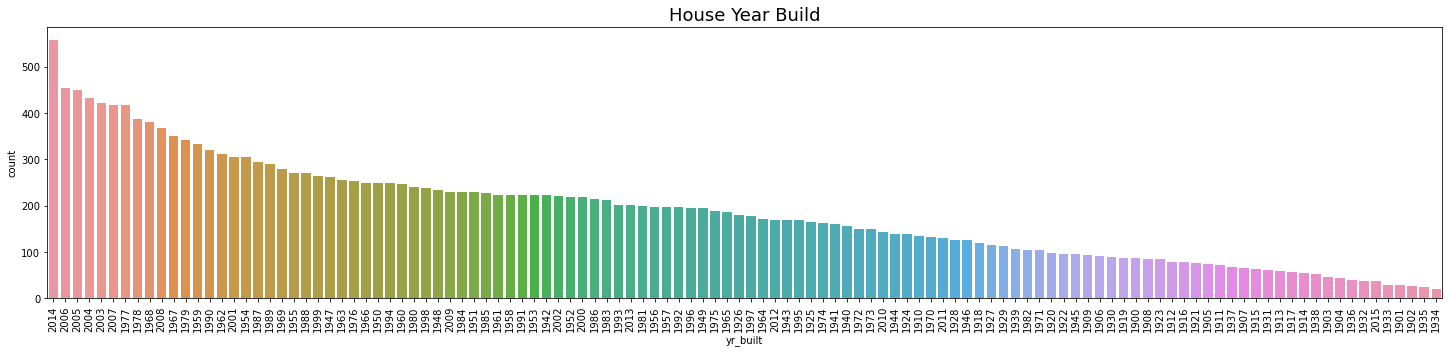

In [20]:
fig = plt.subplots(figsize = (25,5))
sns.countplot(x = 'yr_built', order = df['yr_built'].value_counts().index, data=df)
plt.xticks(rotation=90)
plt.title("House Year Build", size=18)
plt.show()

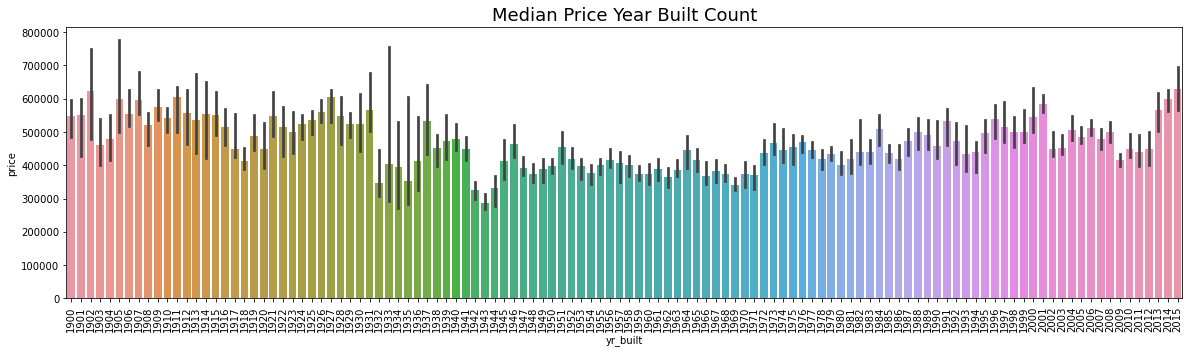

yr_built
2015    629500.0
1902    624000.0
1911    606000.0
1927    605000.0
2014    599000.0
          ...   
1932    345750.0
1969    340250.0
1944    332750.0
1942    326100.0
1943    287450.0
Name: price, Length: 116, dtype: float64

In [12]:
fig = plt.subplots(figsize = (20,5))
sns.barplot(x="yr_built", y="price", data=df, estimator=np.median)
plt.xticks(rotation=90)
plt.title("Median Price Year Built Count", size=18)
plt.show()
audience_genre = df.groupby('yr_built')['price'].agg('median').sort_values(ascending=False)
display(audience_genre)

## Price Group

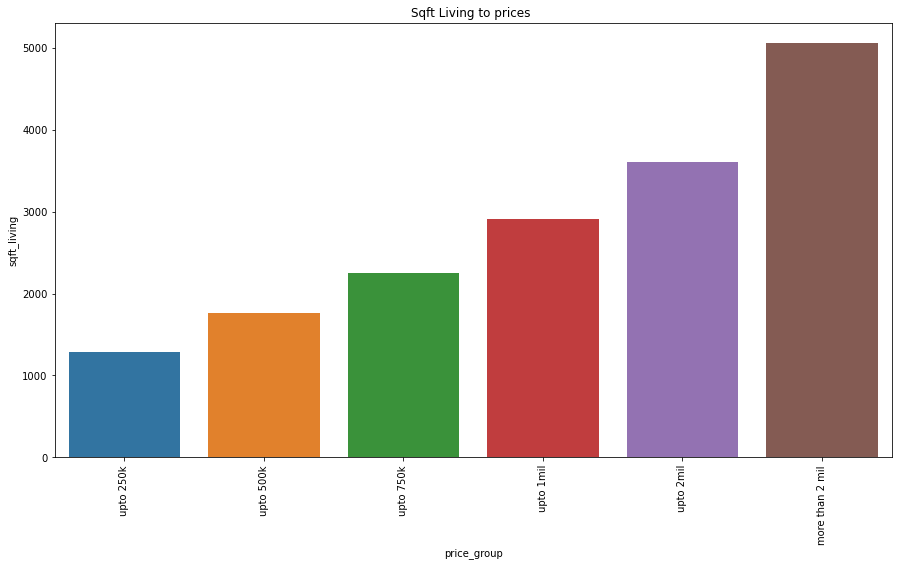

In [37]:
plt.figure(figsize = (15, 8))
sns.barplot(y = 'sqft_living', x = 'price_group', data = df, ci = False)
plt.xticks(rotation = 90)
plt.title('Sqft Living to prices ')
plt.show()

### The more expensive the house the bigger the average square footage of the living space 

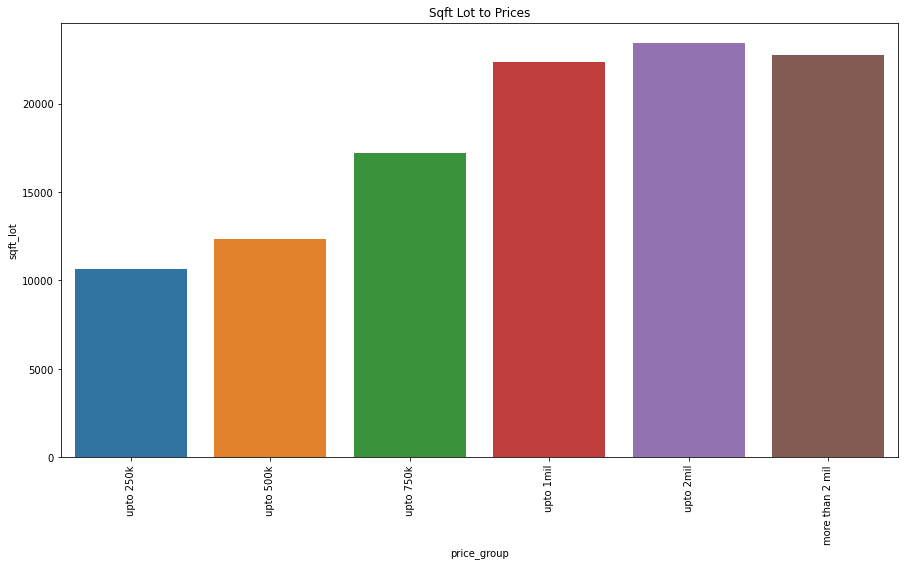

In [39]:
plt.figure(figsize = (15, 8))
sns.barplot(y = 'sqft_lot', x = 'price_group', data = df, ci= False)
plt.xticks(rotation = 90)
plt.title('Sqft Lot to Prices')
plt.show()

### Houses that's in range of 1 - 2 million has the biggest average sqft lot

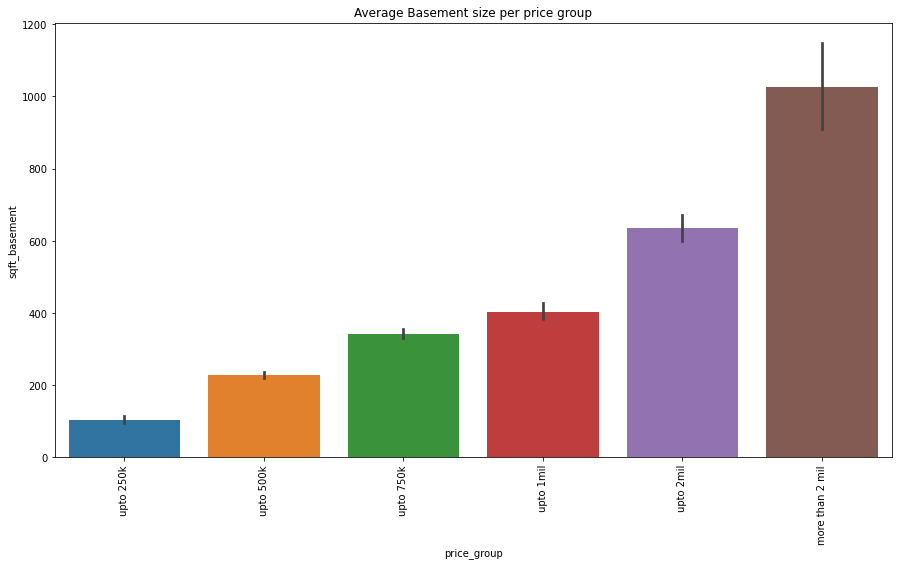

In [41]:
plt.figure(figsize = (15, 8))
sns.barplot(x = 'price_group', y='sqft_basement', data = df)
plt.xticks(rotation = 90)
plt.title('Average Basement size per price group')
plt.show()

### The bigger the basement size the higher the value of a house

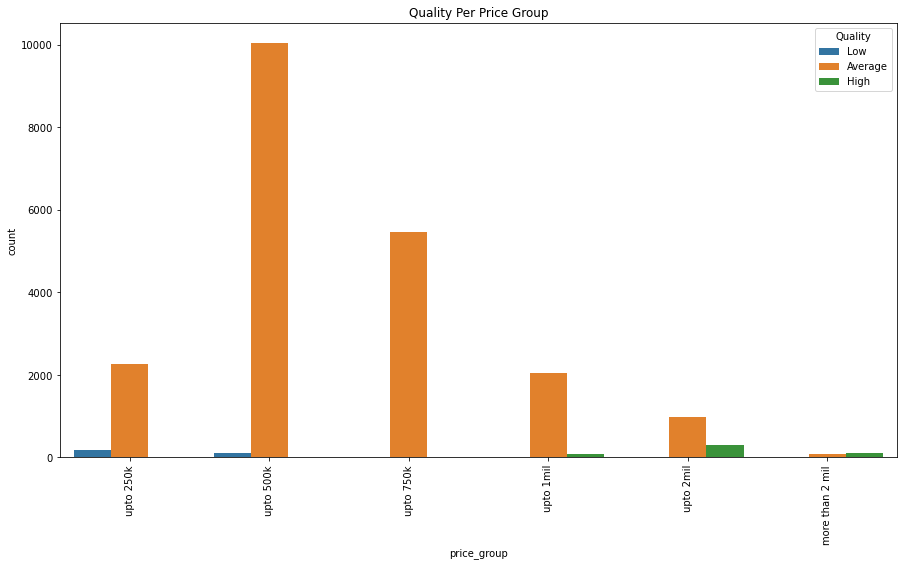

In [48]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'price_group', hue = 'Quality',data = df)
plt.title('Quality Per Price Group')
plt.xticks(rotation = 90)
plt.show()

### Houses that has high Quality are houses that has value from 1mil and above 

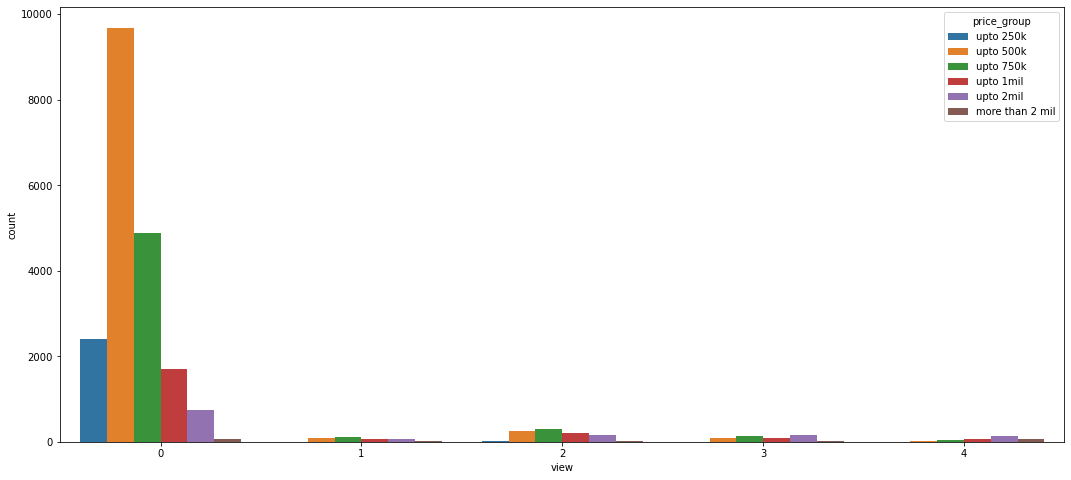

In [51]:
plt.figure(figsize = (18, 8))
sns.countplot(x = df['view'], hue = 'price_group', data = df)
plt.show()

#### This shows that view does not impact the sales of a house much

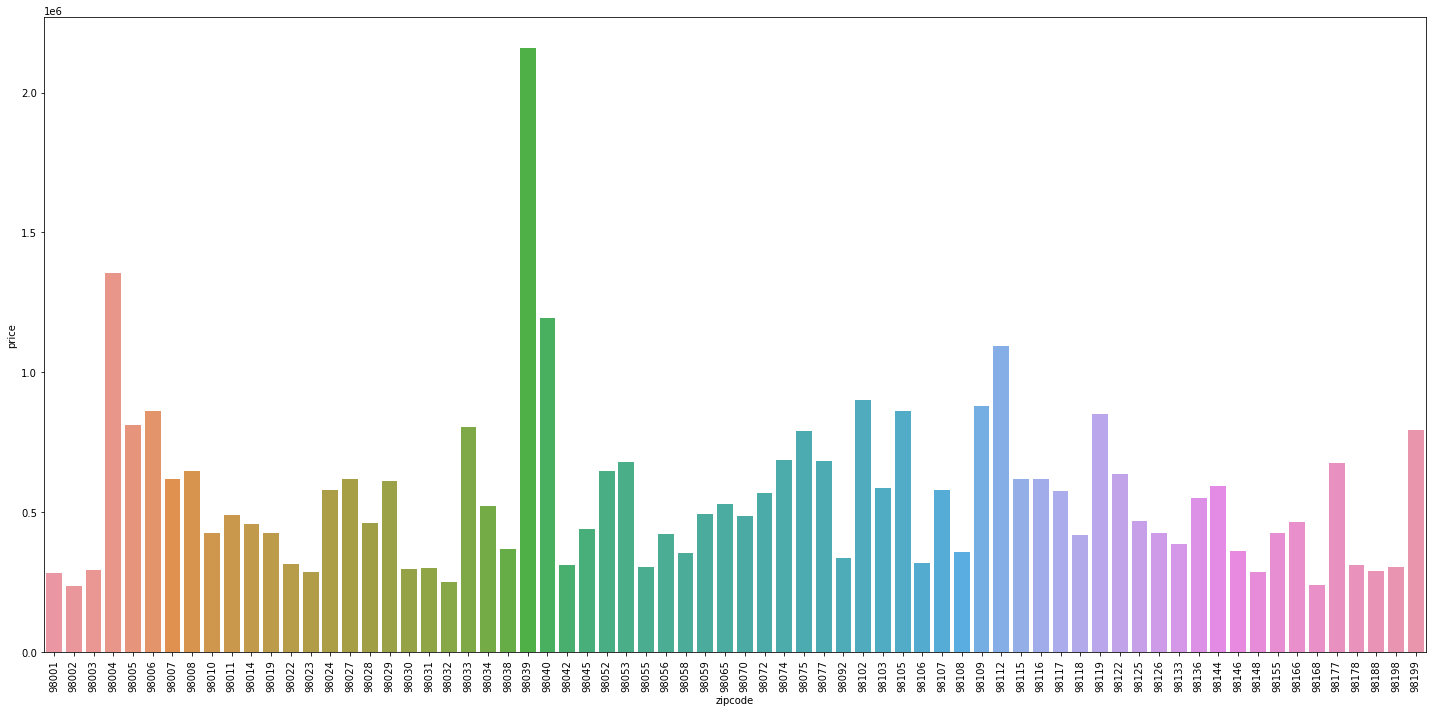

In [53]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'zipcode', y= 'price', data = df,ci = False)
plt.xticks(rotation = 90)
plt.tight_layout()

#### House in zipcode 98039,98004, 98040 are the top 3 zipcode with the highest average price 
#### House in zipcode 98002,98168, 98032 are the top 3 zipcode with the highest average price

# Mapping house based on `price_group`

In [60]:
Washington_map = folium.Map(location = [47.5, -122.2], zoom_start = 10)

In [61]:
df_price_1 =df[df['price_group'] == 'upto 250k']
df_price_2 =df[df['price_group'] == 'upto 500k']
df_price_3 =df[df['price_group'] == 'upto 750k']
df_price_4 =df[df['price_group'] == 'upto 1mil']
df_price_5 =df[df['price_group'] == 'upto 2mil']
df_price_6 =df[df['price_group'] == 'more than 2 mil']

In [62]:
for index, row in df_price_1.sample(n = 100).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(icon = 'building-o', prefix = 'fa', color = 'red')).add_to(Washington_map)

for index, row in df_price_2.sample(n = 100).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(icon = 'building-o', prefix = 'fa', color = 'lightred')).add_to(Washington_map)

for index, row in df_price_3.sample(n = 100).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(icon = 'building-o', prefix = 'fa', color = 'orange')).add_to(Washington_map)
    

for index, row in df_price_4.sample(n = 100).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(icon = 'building-o', prefix = 'fa', color = 'black')).add_to(Washington_map)
    
for index, row in df_price_5.sample(n = 100).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(icon = 'building-o', prefix = 'fa', color = 'blue')).add_to(Washington_map)
    
for index, row in df_price_6.sample(n = 100).iterrows():
    folium.Marker(location = [row.loc['lat'], row.loc['long']],
                  tooltip = f"Price : {row.loc['price']}",
                  icon = folium.Icon(icon = 'building-o', prefix = 'fa', color = 'green')).add_to(Washington_map)

In [63]:
Washington_map

## Mencari Korelasi

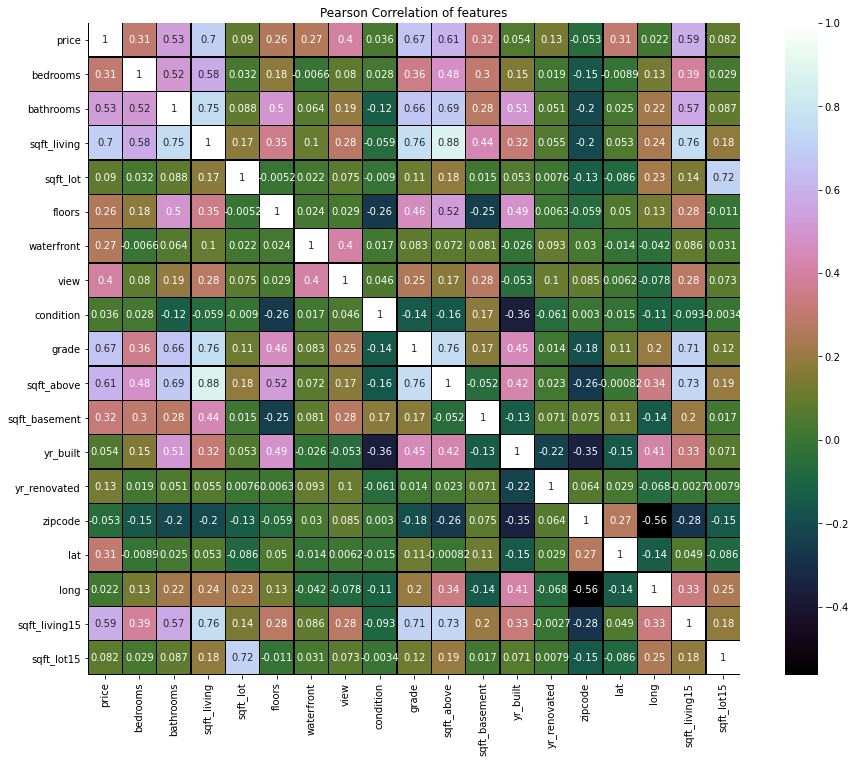

In [4]:
df = df.drop(['id', 'date'],axis=1)
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
plt.show()

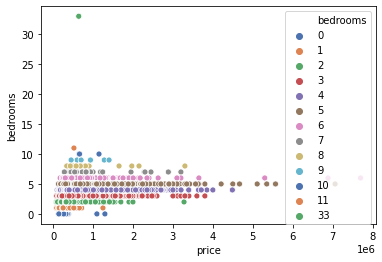

In [21]:
sns.scatterplot(data=df, x="price", y="bedrooms", hue="bedrooms", palette="deep")
plt.show()

From the data above it can be concluded that bedrooms more than 30 are outliers because bedrooms are more than 30 and cheap prices will therefore be dropped 

In [55]:
i = df[((df.bedrooms > 30))].index
df.drop(i, inplace=True)

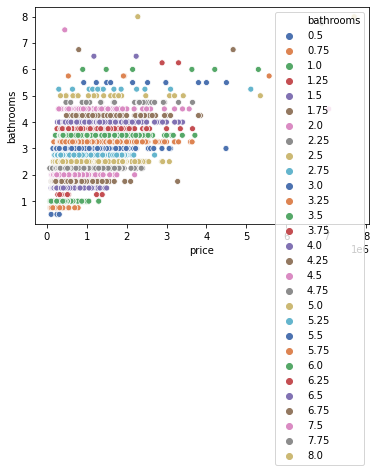

In [56]:
sns.scatterplot(data=df, x="price", y="bathrooms", hue="bathrooms", palette="deep")
plt.show()

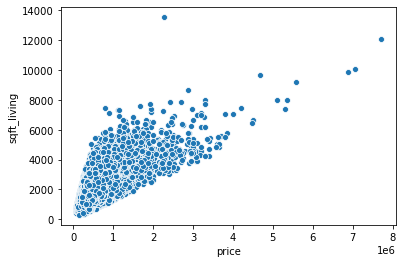

In [42]:
sns.scatterplot(data=df, x="price", y="sqft_living")
plt.show()

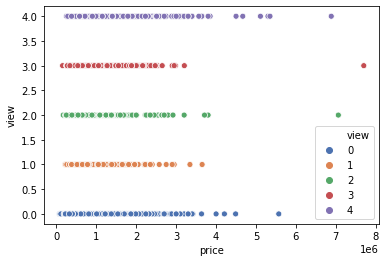

In [38]:
sns.scatterplot(data=df, x="price", y="view", hue="view", palette="deep")
plt.show()

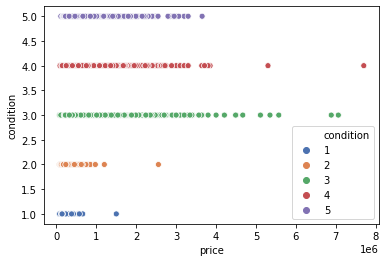

In [37]:
sns.scatterplot(data=df, x="price", y="condition", hue="condition", palette="deep")
plt.show()

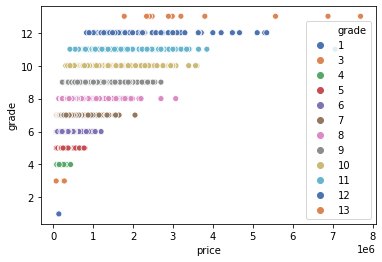

In [39]:
sns.scatterplot(data=df, x="price", y="grade", hue="grade", palette="deep")
plt.show()

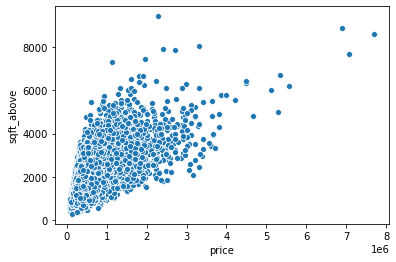

In [41]:
sns.scatterplot(data=df, x="price", y="sqft_above")
plt.show()

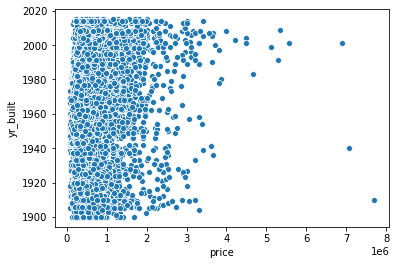

In [45]:
sns.scatterplot(data=df, x="price", y="yr_built")
plt.show()

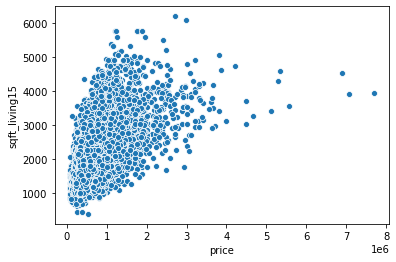

In [47]:
sns.scatterplot(data=df, x="price", y="sqft_living15")
plt.show()

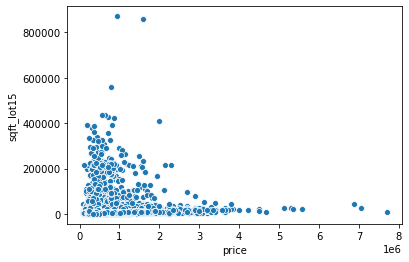

In [48]:
sns.scatterplot(data=df, x="price", y="sqft_lot15")
plt.show()

In [64]:
df.to_csv('House_USA_EDA')

# Conclusion
- Houses with less than one year of age has the highest median price of all age group
- Majority of the houses are in average condition
-  Majority of houses price around 250 - 500k in King County
- 98102 zipcode has the highest average price per square foot among all zipcode in king county
- 98070 zipcode has the lowest average price per square foot among all zipcode
- House that has 3 bedrooms are more the most frequent house that's sold in king county

# Recommendation
- Before Buying a house know your average price for your zipcode first. Eventhough all this house dataset are from King County in Washington, from the analysis shows that a your zipcode is one of the feature to establishing a house value
- Don't worry about your house view. The analysis shows that there's no significance of average price and view per price category, this means that you shouldn't underprice your home even if it doesn't have the most beautiful view
- Increase Your Chances to sell the house by having 3 or 4 bedrooms